# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [ ]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [ ]:
## Declare columns from the URL provided as the dataset doesn't have columns as header
## Load csv with headers=None so that the first row is not taken as column names
## Assign cols array to the column of the dataframe

In [2]:
cols=['id','Clump','UniCellSize','UniCellShape','MargAdhe','EpiCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']
can_df=pd.read_csv('breast-cancer-wisconsin.data.txt',header=None)
can_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
0     699 non-null int64
1     699 non-null int64
2     699 non-null int64
3     699 non-null int64
4     699 non-null int64
5     699 non-null int64
6     699 non-null object
7     699 non-null int64
8     699 non-null int64
9     699 non-null int64
10    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
can_df.columns=cols

In [5]:
can_df.head(5)

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null object
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [ ]:
## All the columns are integers except BareNuclei which is an object as it has 16 missing values

In [7]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null object
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
can_df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [ ]:
## Replace 16 values with median value of not NaN column
## After imputing the median value, convert BareNuclei column to int instead of object
## Outlier analysis
## ----------------
## id column can be discarded as mentioned in the sheet. Also, it seems to have outlier values
## 

In [12]:
can_df[can_df['BareNuclei']=='?']

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [30]:
can_df=can_df.replace('?',np.nan)
can_df.head(10)

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [14]:
median = can_df[np.logical_not(can_df['BareNuclei'].isna())]['BareNuclei'].median()
median

1.0

In [15]:
can_df.fillna(median,inplace=True)

In [16]:
can_df[can_df['BareNuclei']=='?']

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class


In [27]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null object
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [28]:
can_df['BareNuclei']=can_df['BareNuclei'].astype(int)

In [29]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null int32
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


In [39]:
can_df.describe()

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


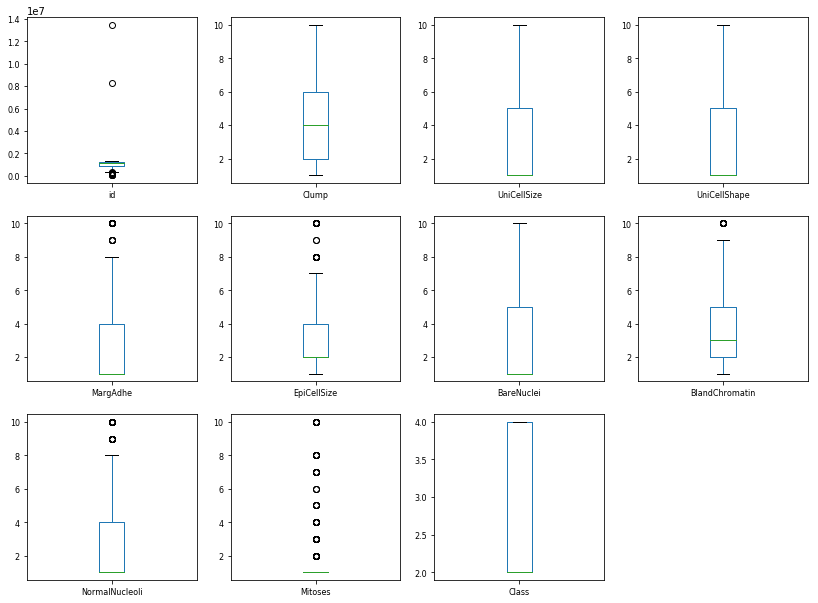

In [40]:
can_df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

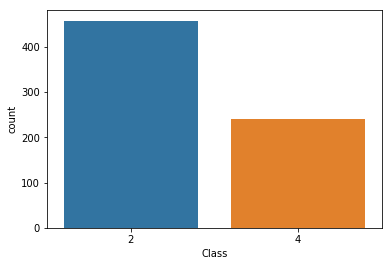

In [41]:
sns.countplot(x='Class',data=can_df)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [17]:
# Check for correlation of variable

In [18]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [19]:
#Let us check for pair plots

In [20]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [31]:
can_df.corr()

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
Clump,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
UniCellSize,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
UniCellShape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
MargAdhe,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
EpiCellSize,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
BareNuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
BlandChromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
NormalNucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


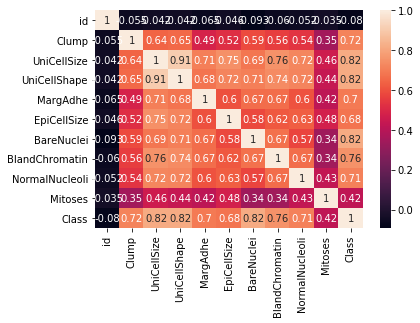

In [32]:
sns.heatmap(can_df.corr(),annot=True)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\senth\AIML\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


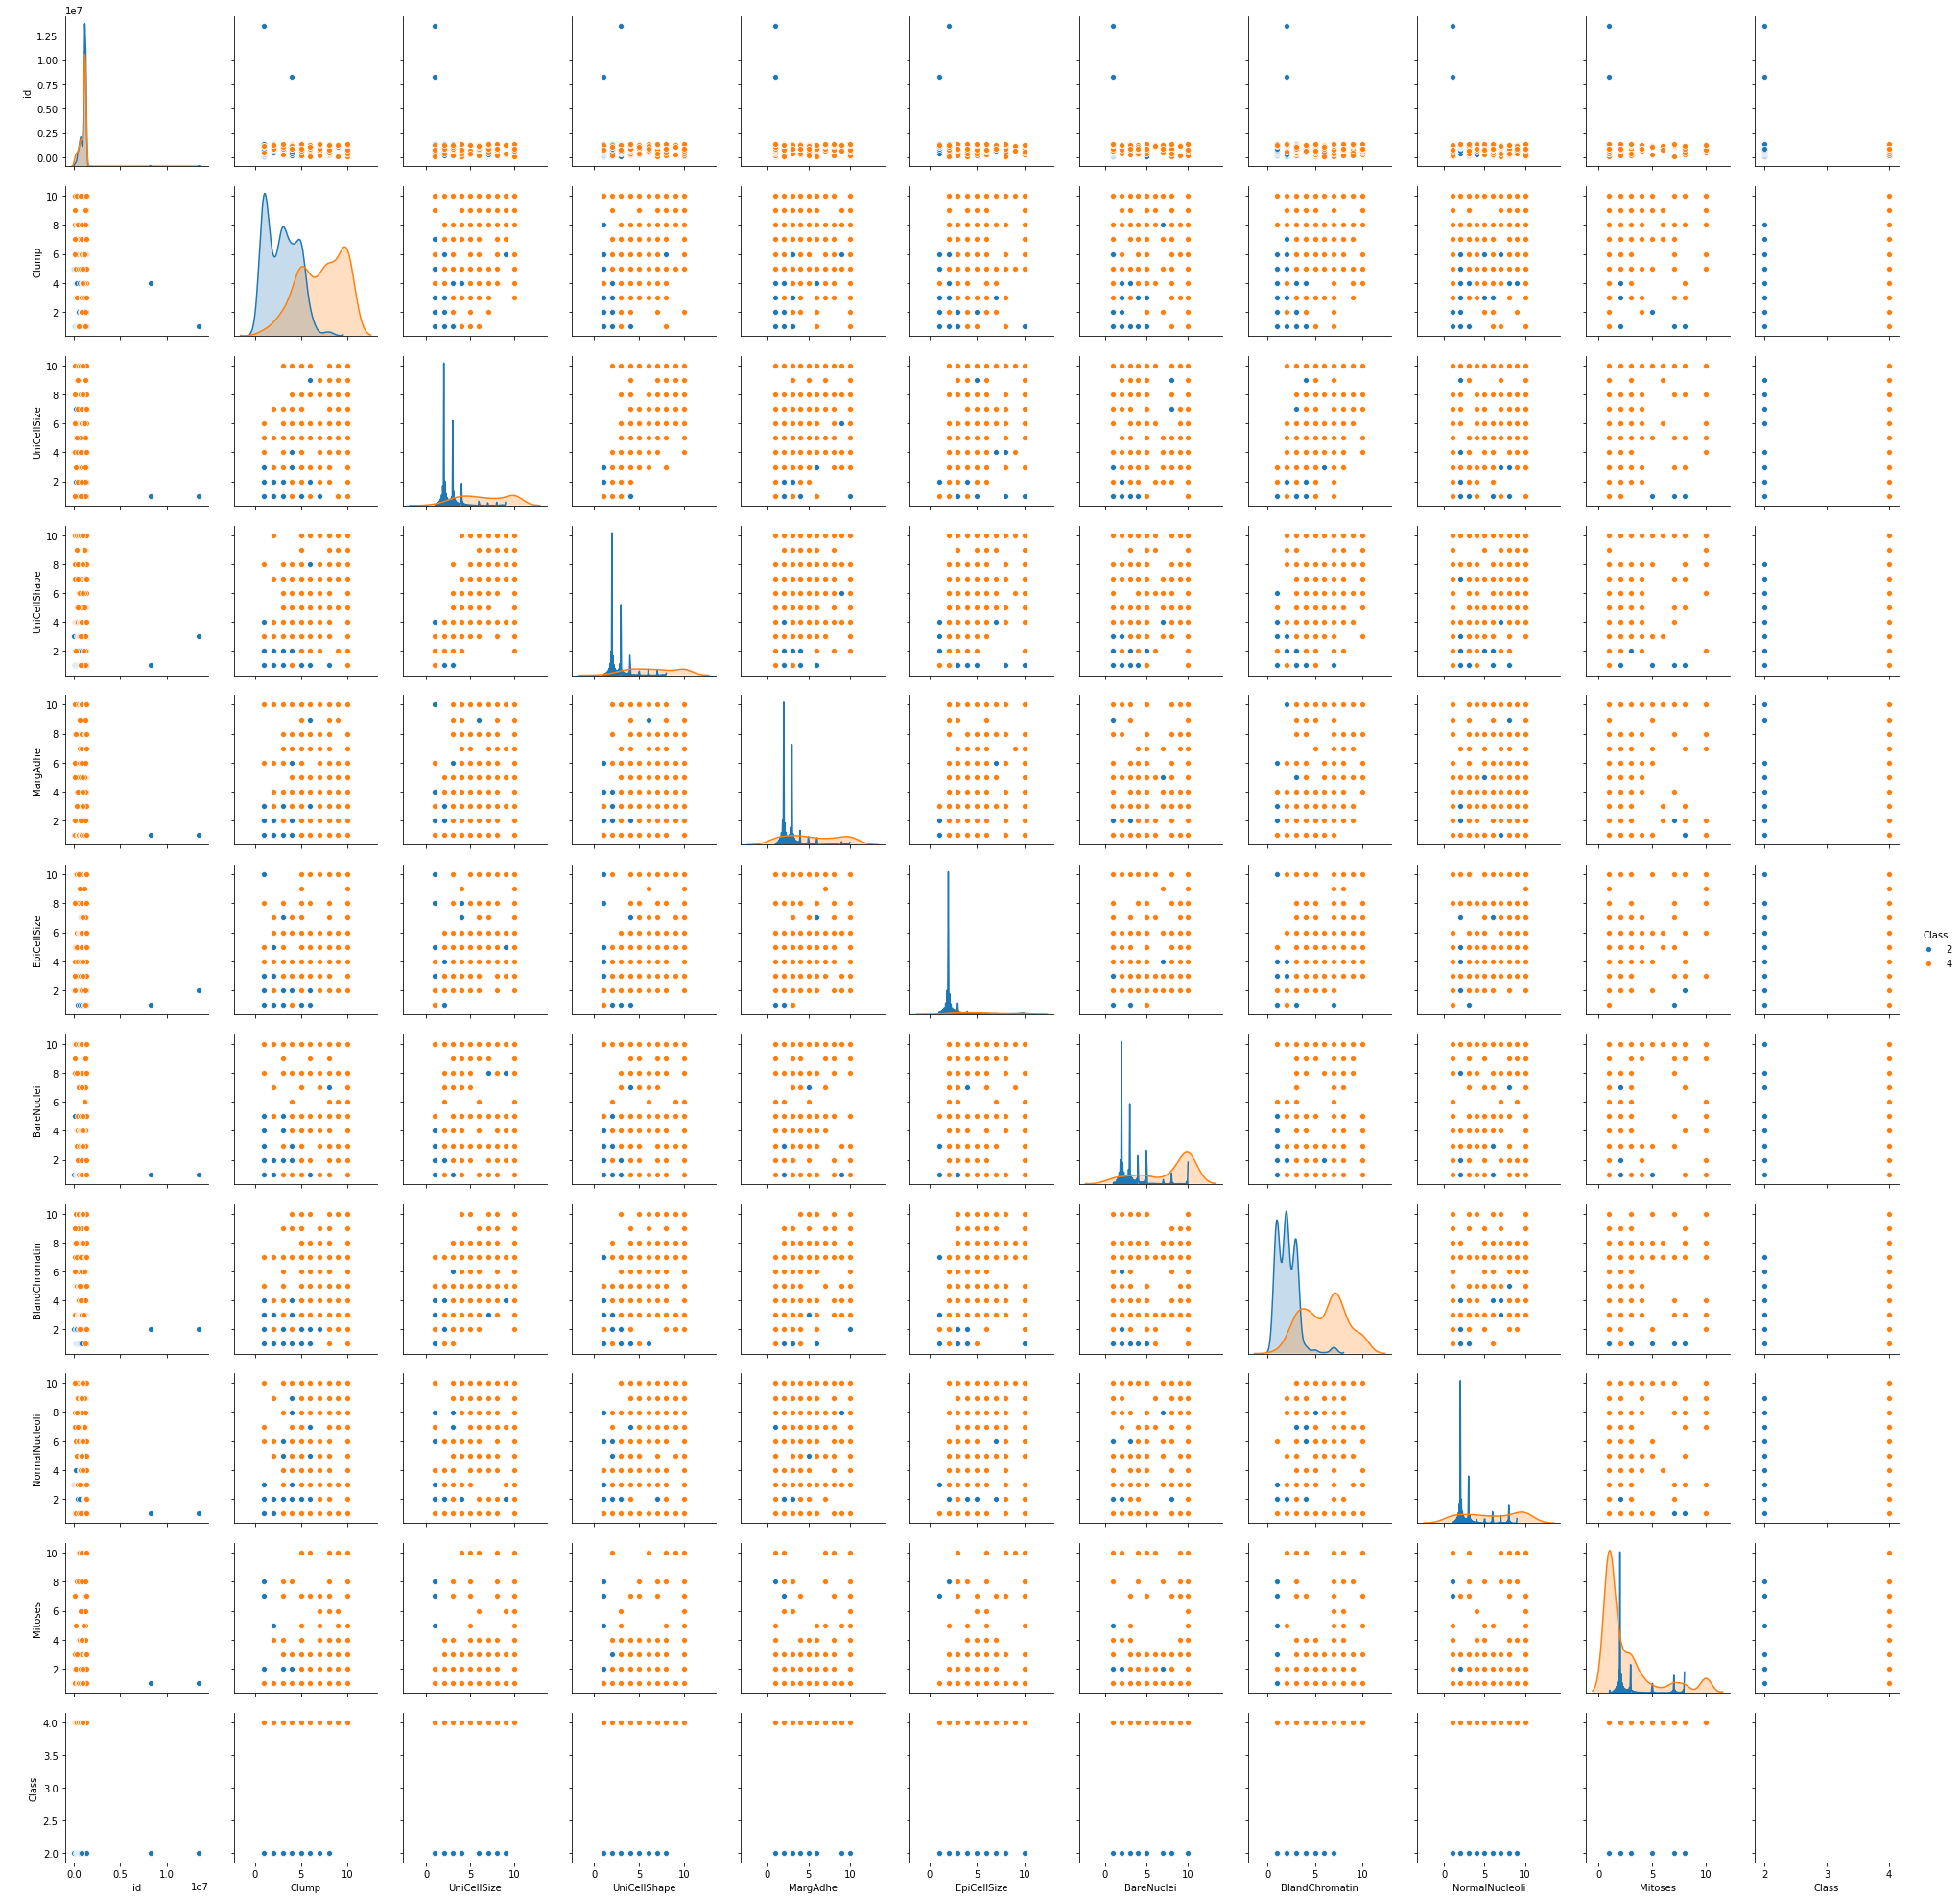

In [45]:
sns.pairplot(can_df,hue='Class',diag_kind='kde')

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [21]:
# We could see most of the outliers are now removed.

In [ ]:
## Id can be removed as it is not of any significance. Correlation is also very less
## Mitoses is the next feature that has too many outliers. So, that can be removed as well
## Other columns can be retained as they don't have too many outliers/the values are within the range

In [44]:
X = can_df[['Clump','UniCellSize','UniCellShape','MargAdhe','EpiCellSize','BareNuclei','BlandChromatin','NormalNucleoli']]
Y = can_df['Class']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [60]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,Y_train)
print(logr.score(X_test,Y_test))
print(classification_report(Y_test,logr.predict(X_test)))
print(confusion_matrix(Y_test,logr.predict(X_test)))

0.9380952380952381
             precision    recall  f1-score   support

          2       0.94      0.96      0.95       137
          4       0.93      0.89      0.91        73

avg / total       0.94      0.94      0.94       210

[[132   5]
 [  8  65]]


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_ss,Y_train)
print(knc.score(X_test_ss,Y_test))
print(classification_report(Y_test,knc.predict(X_test_ss)))
print(confusion_matrix(Y_test,knc.predict(X_test_ss)))

0.9666666666666667
             precision    recall  f1-score   support

          2       0.98      0.97      0.97       137
          4       0.95      0.96      0.95        73

avg / total       0.97      0.97      0.97       210

[[133   4]
 [  3  70]]


In [62]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
print(svc.score(X_test,Y_test))
print(classification_report(Y_test,svc.predict(X_test)))
print(confusion_matrix(Y_test,svc.predict(X_test)))

0.9619047619047619
             precision    recall  f1-score   support

          2       0.99      0.95      0.97       137
          4       0.91      0.99      0.95        73

avg / total       0.96      0.96      0.96       210

[[130   7]
 [  1  72]]


In [65]:
from sklearn.naive_bayes import GaussianNB
bnb = GaussianNB()
bnb.fit(X_train,Y_train)
print(bnb.score(X_test,Y_test))
print(classification_report(Y_test,bnb.predict(X_test)))
print(confusion_matrix(Y_test,bnb.predict(X_test)))

0.9523809523809523
             precision    recall  f1-score   support

          2       0.97      0.96      0.96       137
          4       0.92      0.95      0.93        73

avg / total       0.95      0.95      0.95       210

[[131   6]
 [  4  69]]


In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
print(dtc.score(X_test,Y_test))
print(classification_report(Y_test,dtc.predict(X_test)))
print(confusion_matrix(Y_test,dtc.predict(X_test)))

0.9285714285714286
             precision    recall  f1-score   support

          2       0.95      0.94      0.95       137
          4       0.89      0.90      0.90        73

avg / total       0.93      0.93      0.93       210

[[129   8]
 [  7  66]]


In [67]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(X_train,Y_train)
print(bgc.score(X_test,Y_test))
print(classification_report(Y_test,bgc.predict(X_test)))
print(confusion_matrix(Y_test,bgc.predict(X_test)))

0.9428571428571428
             precision    recall  f1-score   support

          2       0.95      0.96      0.96       137
          4       0.93      0.90      0.92        73

avg / total       0.94      0.94      0.94       210

[[132   5]
 [  7  66]]


In [68]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)
print(abc.score(X_test,Y_test))
print(classification_report(Y_test,abc.predict(X_test)))
print(confusion_matrix(Y_test,abc.predict(X_test)))

0.9619047619047619
             precision    recall  f1-score   support

          2       0.98      0.96      0.97       137
          4       0.93      0.96      0.95        73

avg / total       0.96      0.96      0.96       210

[[132   5]
 [  3  70]]


In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
print(gbc.score(X_test,Y_test))
print(classification_report(Y_test,gbc.predict(X_test)))
print(confusion_matrix(Y_test,gbc.predict(X_test)))

0.9571428571428572
             precision    recall  f1-score   support

          2       0.97      0.96      0.97       137
          4       0.93      0.95      0.94        73

avg / total       0.96      0.96      0.96       210

[[132   5]
 [  4  69]]


In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
print(rfc.score(X_test,Y_test))
print(classification_report(Y_test,rfc.predict(X_test)))
print(confusion_matrix(Y_test,rfc.predict(X_test)))

0.9523809523809523
             precision    recall  f1-score   support

          2       0.96      0.97      0.96       137
          4       0.94      0.92      0.93        73

avg / total       0.95      0.95      0.95       210

[[133   4]
 [  6  67]]


In [71]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
print(xgb.score(X_test,Y_test))
print(classification_report(Y_test,xgb.predict(X_test)))
print(confusion_matrix(Y_test,xgb.predict(X_test)))

0.9428571428571428
             precision    recall  f1-score   support

          2       0.96      0.96      0.96       137
          4       0.92      0.92      0.92        73

avg / total       0.94      0.94      0.94       210

[[131   6]
 [  6  67]]


In [132]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,Y_train)
Y_pred_mlp = mlp.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_mlp))
print(classification_report(Y_test,Y_pred_mlp))

[[134   3]
 [  9  64]]
             precision    recall  f1-score   support

          2       0.94      0.98      0.96       137
          4       0.96      0.88      0.91        73

avg / total       0.94      0.94      0.94       210



C:\Users\senth\AIML\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Q6 Create a covariance matrix for identifying Principal components

In [52]:
# PCA
# Step 1 - Create covariance matrix
X_cov = np.cov(X_train_ss.T)
X_cov

array([[1.00204918, 0.66892494, 0.68285938, 0.53137139, 0.53152299,
        0.60644777, 0.58752733, 0.5394179 ],
       [0.66892494, 1.00204918, 0.92013089, 0.69970278, 0.746073  ,
        0.68458131, 0.73927982, 0.73588427],
       [0.68285938, 0.92013089, 1.00204918, 0.67227952, 0.72198752,
        0.70235965, 0.72584169, 0.71909474],
       [0.53137139, 0.69970278, 0.67227952, 1.00204918, 0.58917349,
        0.66160071, 0.66096521, 0.61713544],
       [0.53152299, 0.746073  , 0.72198752, 0.58917349, 1.00204918,
        0.56400453, 0.57348453, 0.62053664],
       [0.60644777, 0.68458131, 0.70235965, 0.66160071, 0.56400453,
        1.00204918, 0.70164371, 0.57998276],
       [0.58752733, 0.73927982, 0.72584169, 0.66096521, 0.57348453,
        0.70164371, 1.00204918, 0.66914756],
       [0.5394179 , 0.73588427, 0.71909474, 0.61713544, 0.62053664,
        0.57998276, 0.66914756, 1.00204918]])

# Q7 Identify eigen values and eigen vector

In [23]:
# Step 2- Get eigen values and eigen vector

In [54]:
eig_vls,eig_vctrs = np.linalg.eig(X_cov)
print(eig_vls)
print(eig_vctrs)

[5.63815643 0.07866337 0.53164845 0.49809631 0.3955938  0.3356616
 0.25857794 0.27999555]
[[ 0.32143938 -0.01592997  0.44126258 -0.7212237  -0.06329234  0.34537899
   0.22345098  0.0912347 ]
 [ 0.39119809 -0.73091932 -0.19306021 -0.11608514 -0.01977873 -0.06508915
  -0.37282697 -0.34401345]
 [ 0.38807026  0.67473087 -0.13154027 -0.17099201 -0.02881467 -0.12987921
  -0.48243727 -0.31169536]
 [ 0.3406403   0.05217552  0.12307702  0.50482133  0.37164247  0.67688643
   0.00887726 -0.12197213]
 [ 0.33563498  0.04466431 -0.5863839  -0.17507702  0.49332371 -0.17599326
   0.44379326  0.19890161]
 [ 0.3450047  -0.06264082  0.48122288  0.20062541  0.26153577 -0.45218234
  -0.24381134  0.52240604]
 [ 0.3558913   0.0376472   0.23753574  0.28529839 -0.32055788 -0.3477689
   0.5668007  -0.43490466]
 [ 0.3444833   0.01352997 -0.32205516  0.17314759 -0.66492697  0.21224326
  -0.02420166  0.50959571]]


# Q8 Find variance and cumulative variance by each eigen vector

In [80]:
eig_vls_cum = np.sort(eig_vls/eig_vls.sum())
eig_vls_cum

array([0.00981281, 0.03225614, 0.03492787, 0.0418719 , 0.0493481 ,
       0.06213471, 0.06632015, 0.70332831])

In [85]:
tot = sum(eig_vls)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vls, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 70.3328307   76.96484611  83.17831744  88.11312756  92.30031723
  95.79310429  99.0187187  100.        ]


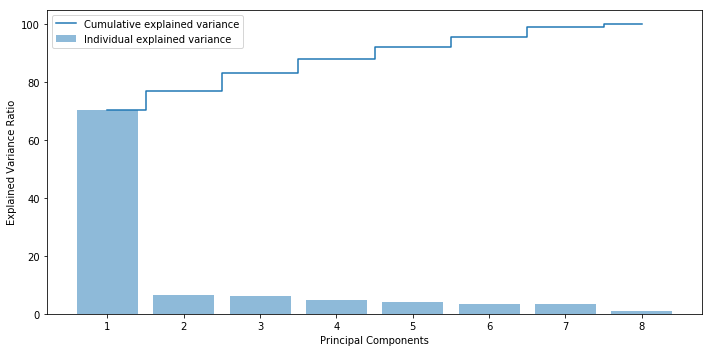

In [87]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vls.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vls.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'bdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAsgAAAFgCAYAAACmDI9oAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvIxREBQAAIABJREFUeJzt3Xu8lXWd9//XR2BCEVSE5kbBtpqiIFvOyeggntLK1CkNnXJCC00lpcM9dphEGO1hRdaklSF5a5MZinbjeYzELG9PgEocPBVmKCmGgigY6Of3x1rs3xL2YXFY+9obXs/HYz/Wus6f6xL1zXd/r+83MhNJkiRJJTsUXYAkSZLUlhiQJUmSpAoGZEmSJKmCAVmSJEmqYECWJEmSKhiQJUmSpAoGZEmSJKmCAVmSJEmqYECWJEmSKnQsuoAt0aNHj6yrqyu6DEmSJLUDc+bMeSUze7a0X7sOyHV1dcyePbvoMiRJktQORMSfq9nPLhaSJElSBQOyJEmSVMGALEmSJFVo132QG7N27VqWLFnCmjVrii5FajWdO3emd+/edOrUqehSJElq97a5gLxkyRK6du1KXV0dEVF0OVLNZSZ/+9vfWLJkCXvvvXfR5UiS1O5tc10s1qxZw+6772441nYjIth99939rYkkSVvJNheQAcOxtjv+mZckaevZJgOyJEmStLkMyDXw17/+lVNPPZV9992Xfv368eEPf5inn366ptccNWpUi5OmfP/73+fNN99sWP7whz/Ma6+9VtO6NsWYMWOYPn16s/tcdNFFzJw5c6tcr5pntjm2Zo2SJKn11SwgR8Q1EfFyRMyvWNc9In4dEc+UP3crr4+I+EFEPBsR8yJicK3qqrXM5F/+5V8YNWoUf/zjH1m4cCHf/OY3eemll4oubaOAfOedd7LrrrsWWNGmmzRpEkcffXTRZTTp7bffbvM1SpKk5tWyBfla4LgN1n0F+E1m7gf8prwM8CFgv/LPWcCPt0YBE29bwOifPLhVfybetqDZa86aNYtOnTrxuc99rmHdwIED+ed//mfuu+8+jj/++Ib148aN49prrwVK02Z/7WtfY8SIEQwdOpS5c+dy7LHHsu+++3LVVVcBNHt8pXPOOYehQ4fSv39/JkyYAMAPfvADXnzxRY444giOOOKIhmu+8sorXHjhhfzoRz9qOP7iiy/mu9/9LgDf+c53GDZsGPX19Q3n2tA999zDiBEjGDx4MKeccgqrVq1ixYoV9O3bl6eeegqA0047jauvvhqAnXfemS996UsMHjyYo446imXLlm10zkmTJjFs2DAOOuggzjrrLDITeHcrc11dHRMmTGDw4MEMGDCAJ598EoA33niDM888k2HDhjFo0CBmzJgBwOrVqzn11FOpr69n9OjRrF69eqPr3nXXXXziE59oWL7vvvv46Ec/2uRzXV/HpEmTOOyww7jpppveVWNT9zFq1CguvPBChg8fzv7778/vfvc7oBSwv/zlLzNgwADq6+u54oorAJgzZw6HH344Q4YM4dhjj2Xp0qWN/rOQJElbrmbDvGXm/RFRt8HqE4FR5e/XAfcBF5bX/yxL6eGhiNg1InplZrtLAfPnz2fIkCGbdWyfPn148MEH+cIXvsCYMWN44IEHWLNmDf37939X4G7JpZdeSvfu3Xn77bc56qijmDdvHueffz6XX345s2bNokePHu/a/9RTT2X8+PGce+65ANx4443cfffd3HPPPTzzzDM88sgjZCYnnHAC999/PyNHjmw49pVXXuGSSy5h5syZdOnShW9961tcfvnlXHTRRVx55ZWMGTOGCy64gFdffZWxY8cCpQA7ePBgvvvd7zJp0iQmTpzIlVde+a6axo0bx0UXXQTA6aefzu23394QVCv16NGDuXPn8qMf/YjJkyczdepULr30Uo488kiuueYaXnvtNYYPH87RRx/NT37yE3baaSfmzZvHvHnzGDx4419UHHPMMZx99tm88cYbdOnShWnTpjF69Ogmn2t9fT1QGof497//PQB33313Vfexbt06HnnkEe68804mTpzIzJkzmTJlCosXL+axxx6jY8eOLF++nLVr1/L5z3+eGTNm0LNnT6ZNm8bXv/51rrnmmmr/SEiSCvSLh59nxuMvFF1Go/rt0Y0JH+1fdBltTmuPg/yP60NvZi6NiPeW1+8J/KVivyXldRsF5Ig4i1IrM3vttVezF2tv/8BPOOEEAAYMGMCqVavo2rUrXbt2pXPnzpvUV/jGG29kypQprFu3jqVLl7Jw4cKGINeYQYMG8fLLL/Piiy+ybNkydtttN/baay9+8IMfcM899zBo0CAAVq1axTPPPPOugPzQQw+xcOFCDj30UAD+/ve/M2LECKAUNm+66SbOO+88nnjiiYZjdthhh4bQ+alPfYqPfexjG9U0a9Ysvv3tb/Pmm2+yfPly+vfv32hAXn/skCFDuOWWW4BSi/att97K5MmTgdLQf88//zz3338/559/PgD19fWNPpOOHTty3HHHcdttt3HyySdzxx138O1vf7vF57r+fjblPiprf+655wCYOXMmn/vc5+jYsfSvZvfu3Zk/fz7z58/nmGOOAUqtzL169Wr0epKktmfG4y+wcOlK+vXqVnQpqlJbmSiksTGqsrEdM3MKMAVg6NChje5TpP79+zf5olnHjh155513GpY3HLf2Pe95D1AKkOu/r19et25di8cDLF68mMmTJ/Poo4+y2267MWbMmKrGxz355JOZPn16wwuGUOpP/dWvfpWzzz67yeMyk2OOOYYbbrhho23vvPMOixYtYscdd2T58uX07t270XNsOETZmjVrOPfcc5k9ezZ9+vTh4osvbvIe1j+nDh06sG7duoaabr75Zvr27dvitRozevRofvjDH9K9e3eGDRtG165dW3yuXbp02eg8Ld1HU7VvWGNm0r9/fx588MEWa5cktU39enVj2tkjii5DVWrtgPzS+q4TEdELeLm8fgnQp2K/3sCLrVzbVnHkkUfyta99jauvvrqhS8Gjjz7Km2++yT777MPChQt56623WLNmDb/5zW847LDDqj73+973vhaPX7lyJV26dGGXXXbhpZde4q677mLUqFEAdO3alddff32jLhZQ6mYxduxYXnnlFX77298CcOyxx/KNb3yDT37yk+y888688MILdOrUife+970Nxx1yyCGcd955PPvss7z//e/nzTffZMmSJey///5873vf48ADD+Sb3/wmZ555Jg8++CCdOnXinXfeYfr06Zx66qn84he/2Oge1ofIHj16sGrVKqZPn87JJ59c9XM69thjueKKK7jiiiuICB577DEGDRrEyJEjuf766zniiCOYP38+8+bNa/T4UaNG8ZnPfIarr766oWW4uefalM25jw9+8INcddVVjBo1qqGLRd++fVm2bBkPPvggI0aMYO3atTz99NP079++fkMiadvQlrsLtFW2Hrc/rR2QbwU+DVxW/pxRsX5cRPwS+ACwoj32P4ZSC+WvfvUrxo8fz2WXXUbnzp2pq6vj+9//Pn369OETn/gE9fX17Lfffg1dF6pVzfEHH3wwgwYNon///uyzzz4NXR8AzjrrLD70oQ/Rq1cvZs2a9a7j+vfvz+uvv86ee+7Z8Ov7D37wgyxatKihy8TOO+/Mz3/+83cF5J49e3Lttddy2mmn8dZbbwFwySWXADB16lQeeeQRunbtysiRI7nkkkuYOHEiXbp0YcGCBQwZMoRddtmFadOmvauWXXfdlbFjxzJgwADq6uoYNmzYJj2nb3zjG4wfP576+noyk7q6Om6//XbOOecczjjjDOrr6xk4cCDDhw9v9PgOHTpw/PHHc+2113Lddde1+Fybsjn38dnPfpann36a+vp6OnXqxNixYxk3bhzTp0/n/PPPZ8WKFaxbt47x48cbkCUVwu4Cm65fr26cOHDPosvQJoj1b9Vv9RNH3EDphbwewEvABOD/AjcCewHPA6dk5vIo/U75SkqjXrwJnJGZLQ5QO3To0NxwHNtFixZx4IEHbsU70da28847s2rVqqLL2Ob4Z19Saxj9k1J3L7sLqD2KiDmZObSl/Wo5isVpTWw6qpF9EzivVrVIkiRJ1XImPbU6W48lSVJbZkCWJEmSKhiQJUmSpAoGZEmSJKmCAVmSJEmq0FZm0quZ7/366a16vi8cs3+L+2zqMGb33XcfkydP5vbbb+fWW29l4cKFfOUrX2ly/4suuoiRI0dy9NFHN3mezVFXV8fs2bMbnUhkaxgzZgzHH398s5NlNHVvm2PUqFFMnjyZoUNbHM1lk2zNGiVJUtuzzQfk9uaEE07ghBNOaHafSZMmtVI1ra+t39vbb7/d5muUtGmcGW7TOEmItgd2saih++67j1GjRnHyySdzwAEH8MlPfpL1E7PcfffdHHDAARx22GHccsstDcdce+21jBs3jhUrVlBXV8c777wDwJtvvkmfPn1Yu3YtY8aMYfr06c2e5+KLL2by5MkNywcddBDPPfccACeddBJDhgyhf//+TJkypcX7uOeeexgxYgSDBw/mlFNOYdWqVaxYsYK+ffvy1FNPAXDaaadx9dVXA6UW9C996UsMHjyYo446imXLlm10zkmTJjFs2DAOOuggzjrrrIbnUnlvdXV1TJgwgcGDBzNgwACefPJJAN544w3OPPNMhg0bxqBBg5gxozQh4+rVqzn11FOpr69n9OjRrF69eqPr3nXXXXziE5941z+jj370owCcc845DB06lP79+zNhwoSGferq6pg0aRKHHXYYN91007tqbOo+Ro0axYUXXsjw4cPZf//9+d3vfgeUAvaXv/xlBgwYQH19PVdccQUAc+bM4fDDD2fIkCEce+yxLF3aLieSlNql9TPDqTrOCqftgS3INfbYY4+xYMEC9thjDw499FAeeOABhg4dytixY7n33nt5//vfz+jRozc6bpddduHggw/mt7/9LUcccQS33XYbxx57LJ06dWrYZ82aNS2epzHXXHMN3bt3Z/Xq1QwbNoyPf/zj7L777o3u+8orr3DJJZcwc+ZMunTpwre+9S0uv/xyLrroIq688krGjBnDBRdcwKuvvsrYsWOBUoAdPHgw3/3ud5k0aRITJ07kyiuvfNd5x40bx0UXXQTA6aefzu23394QVCv16NGDuXPn8qMf/YjJkyczdepULr30Uo488kiuueYaXnvtNYYPH87RRx/NT37yE3baaSfmzZvHvHnzGDx48EbnO+aYYzj77LN544036NKlC9OmTWt4bpdeeindu3fn7bff5qijjmLevHnU19cD0LlzZ37/+98Dpb+UVHMf69at45FHHuHOO+9k4sSJzJw5kylTprB48WIee+wxOnbsyPLly1m7di2f//znmTFjBj179mTatGl8/etf55prrqnqn6ekLdevVzdnhpPUwBbkGhs+fDi9e/dmhx12YODAgTz33HM8+eST7L333uy3335EBJ/61KcaPXb06NFMmzYNgF/+8pcbBeBqz7OhH/zgBxx88MEccsgh/OUvf+GZZ55pct+HHnqIhQsXcuihhzJw4ECuu+46/vznPwOlsDlgwADOO+88pk6d2nDMDjvs0FDrpz71qYZgWWnWrFl84AMfYMCAAdx7770sWLCg0et/7GMfA2DIkCENLeD33HMPl112GQMHDmTUqFGsWbOG559/nvvvv7/hGdTX1zeE20odO3bkuOOO47bbbmPdunXccccdnHjiiQDceOONDB48mEGDBrFgwQIWLlzYcFxTf/lo7j4aq33mzJl87nOfo2PH0t9Nu3fvzlNPPcX8+fM55phjGDhwIJdccglLlixp9HqSJKn2bEGusfe85z0N3zt06MC6desAiIgWjz3hhBP46le/yvLly5kzZw5HHnnkRvs0dZ6OHTs2dM+AUmszlLoUzJw5kwcffJCddtqpIWA2JTM55phjuOGGGzba9s4777Bo0SJ23HFHli9fTu/evRs9x4Y1rlmzhnPPPZfZs2fTp08fLr744iZrWP/8Kp9dZnLzzTfTt2/fFq/VmNGjR/PDH/6Q7t27M2zYMLp27crixYuZPHkyjz76KLvtthtjxox5V01dunTZ6Dwt3UdTtW9YY2bSv39/HnzwwRZrlyRJtWcLcgEOOOAAFi9ezB//+EeARsMnlPryDh8+nAsuuIDjjz+eDh06VH2euro65s6dC8DcuXNZvHgxACtWrGC33XZjp5124sknn+Shhx5qttZDDjmEBx54gGeffRYo9YV++unSyCDf+973OPDAA7nhhhs488wzWbt2LVAKzuv76P7iF7/gsMMOe9c514fIHj16sGrVqoZ9q3XsscdyxRVXNPT3feyxxwAYOXIk119/PQDz589n3rx5jR4/atQo5s6dy9VXX93QMrxy5Uq6dOnCLrvswksvvcRdd93VYh2bcx8f/OAHueqqqxoC8/Lly+nbty/Lli1rCMhr165tskVdkiTV3jbfglzNsGytrXPnzkyZMoWPfOQj9OjRg8MOO4z58+c3uu/o0aM55ZRTuO+++zbpPB//+Mf52c9+xsCBAxk2bBj77196DscddxxXXXUV9fX19O3bl0MOOaTZWnv27Mm1117LaaedxltvvQXAJZdcAsDUqVN55JFH6Nq1KyNHjuSSSy5h4sSJdOnShQULFjBkyBB22WWXhm4i6+26666MHTuWAQMGUFdXx7Bhwzbp+X3jG99g/Pjx1NfXk5nU1dVx++23c84553DGGWdQX1/PwIEDGT58eKPHd+jQgeOPP55rr72W6667DoCDDz6YQYMG0b9/f/bZZx8OPfTQFuvYnPv47Gc/y9NPP019fT2dOnVi7NixjBs3junTp3P++eezYsUK1q1bx/jx4+nfv/8mPRdJkrR1xPpWuPZo6NChOXv27HetW7RoEQceeGBBFQk2fRxobR3+2Zc2z+iflH5740t60rYvIuZkZosTJNjFQpIkSapgQNZWZ+uxJElqz7bJPsiNjRQgbcvac1cpbX3ODLdpnBlO0oa2uRbkzp0787e//c3AoO1GZvK3v/2Nzp07F12K2ghnhts0zgwnaUPbXAty7969WbJkSaPTG0vbqs6dOzc5DrW2T84MJ0mbb5sLyJ06dWLvvfcuugxJkiS1U9tcFwtJkiRpSxiQJUmSpAoGZEmSJKmCAVmSJEmqYECWJEmSKhiQJUmSpAoGZEmSJKmCAVmSJEmqsM1NFCJp2/KLh59nxuMvFF1Gu7Jw6Ur69epWdBmS1G7ZgiypTZvx+AssXLqy6DLalX69unHiwD2LLkOS2i1bkCW1ef16dWPa2SOKLkOStJ2wBVmSJEmqYECWJEmSKhiQJUmSpAoGZEmSJKmCAVmSJEmqYECWJEmSKhiQJUmSpAoGZEmSJKmCAVmSJEmqYECWJEmSKhiQJUmSpAodiy5A2t784uHnmfH4C0WX0W4sXLqSfr26FV2GJGk7Yguy1MpmPP4CC5euLLqMdqNfr26cOHDPosuQJG1HbEGWCtCvVzemnT2i6DIkSVIjbEGWJEmSKhiQJUmSpAoGZEmSJKmCAVmSJEmqUEhAjogvRMSCiJgfETdEROeI2DsiHo6IZyJiWkT8QxG1SZIkafvW6gE5IvYEzgeGZuZBQAfgVOBbwPcycz/gVeAzrV2bJEmSVFQXi47AjhHREdgJWAocCUwvb78OOKmg2iRJkrQda/WAnJkvAJOB5ykF4xXAHOC1zFxX3m0J0OjMABFxVkTMjojZy5Yta42SJUmStB0poovFbsCJwN7AHkAX4EON7JqNHZ+ZUzJzaGYO7dmzZ+0KlSRJ0napiC4WRwOLM3NZZq4FbgH+Cdi13OUCoDfwYgG1SZIkaTtXREB+HjgkInaKiACOAhYCs4CTy/t8GphRQG2SJEnazhXRB/lhSi/jzQX+UK5hCnAh8MWIeBbYHfhpa9cmSZIkdWx5l60vMycAEzZY/SdgeAHlSJIkSQ2cSU+SJEmqYECWJEmSKhTSxULbll88/DwzHn+h6DLajYVLV9KvV7eiy5AkSU2wBVlbbMbjL7Bw6cqiy2g3+vXqxokDG50HR5IktQG2IGur6NerG9POHlF0GZIkSVvMFmRJkiSpggFZkiRJqmBAliRJkioYkCVJkqQKBmRJkiSpggFZkiRJqmBAliRJkioYkCVJkqQKLU4UEhGdgHOAkeVVvwWuysy1tSxMkiRJKkI1M+n9GOgE/Ki8fHp53WdrVZQkSZJUlGoC8rDMPLhi+d6IeKJWBUmSJElFqqYP8tsRse/6hYjYB3i7diVJkiRJxammBfl/A7Mi4k9AAO8DzqhpVZIkSVJBWgzImfmbiNgP6EspID+ZmW/VvDJJkiSpAE0G5Ig4MjPvjYiPbbBp34ggM2+pcW2SJElSq2uuBflw4F7go41sS8CALEmSpG1OkwE5MyeUv07KzMWV2yJi75pWpY1MvG0BC19cWXQZjVq4dCX9enUrugxJkqStopqX9G4GBm+wbjowZOuX0z5879dPt/o1H3v+NZa9XlzX79677djktn69unHiwD1bsRpJkqTaaa4P8gFAf2CXDfohdwM617owvdvh+/cs9PpfOGb/Qq8vSZLUWpprQe4LHA/syrv7Ib8OjK1lUZIkSVJRmuuDPAOYEREjMvPBVqxJkiRJKkw1fZAfi4jzKHW3aOhakZln1qwqSZIkqSDVTDX938D/Ao4Ffgv0ptTNQpIkSdrmVBOQ35+Z3wDeyMzrgI8AA2pbliRJklSMagLy2vLnaxFxELALUFeziiRJkqQCVdMHeUpE7Ab8B3ArsDNwUU2rkiRJkgrSYkDOzKnlr/cD+9S2HEmSJKlYzXaxiIgOEdGjYvkfImJsRCyqfWmSJElS62syIEfEqcByYF5E/DYijgD+BHwY+GQr1SdJkiS1qua6WPwHMCQzn42IwcCDwKmZ+avWKU2SJElqfc11sfh7Zj4LkJlzgcWGY0mSJG3rmmtBfm9EfLFieefK5cy8vHZlSZIkScVoLiBfDXRtZlmSJEna5jQZkDNzYmsWIkmSJLUF1cykJ0mSJG03DMiSJElSBQOyJEmSVKHFgBwR/xgRP42Iu8rL/SLiM7UvTZIkSWp91bQgXwv8D7BHeflpYHytCpIkSZKKVE1A7pGZNwLvAGTmOuDtmlYlSZIkFaSagPxGROwOJEBEHAKsqGlVkiRJUkGamyhkvS8CtwL7RsQDQE/g5JpWJUmSJBWkxYCcmXMj4nCgLxDAU5m5tuaVSZIkSQWoZhSL84CdM3NBZs4Hdo6Ic2tfmiRJktT6qumDPDYzX1u/kJmvAmO35KIRsWtETI+IJyNiUUSMiIjuEfHriHim/LnbllxDkiRJ2hzVBOQdIiLWL0REB+AftvC6/wXcnZkHAAcDi4CvAL/JzP2A35SXJUmSpFZVTUD+H+DGiDgqIo4EbgDu3twLRkQ3YCTwU4DM/Hu5hfpE4LrybtcBJ23uNSRJkqTNVc0oFhcCZwPnUHpJ7x5g6hZccx9gGfB/IuJgYA5wAfCPmbkUIDOXRsR7Gzs4Is4CzgLYa6+9tqAMSZIkaWMttiBn5juZ+ePMPDkzP56ZP8nMLZkopCMwGPhxZg4C3mATulNk5pTMHJqZQ3v27LkFZUiSJEkbq2YUi0PLL809HRF/iojFEfGnLbjmEmBJZj5cXp5OKTC/FBG9ytfsBby8BdeQJEmSNks1XSx+CnyBUleILZ5iOjP/GhF/iYi+mfkUcBSwsPzzaeCy8ueMLb2WJEmStKmqCcgrMvOurXzdzwPXR8Q/AH8CzqDUmn1jRHwGeB44ZStfU5IkSWpRNQF5VkR8B7gFeGv9ysycu7kXzczHgaGNbDpqc88pSZIkbQ3VBOQPlD8rA20CR279ciRJkqRitRiQM/OI1ihEkiRJaguqaUEmIj4C9Ac6r1+XmZNqVZQkSZJUlGqGebsKGE3pxbqg9PLc+2pclyRJklSIaqaa/qfM/Dfg1cycCIwA+tS2LEmSJKkY1QTk1eXPNyNiD2AtsHftSpIkSZKKU00f5NsjYlfgO8BcSiNYTK1pVZIkSVJBqhnF4j/LX2+OiNuBzpm5orZlSZIkScVoMiBHxJGZeW9EfKyRbWTmLbUtTZIkSWp9zbUgHw7cC3y0kW1JaWY9SZIkaZvSZEDOzAkRsQNwV2be2Io1SZIkSYVpdhSLzHwHGNdKtUiSJEmFq2aYt19HxJcjok9EdF//U/PKJEmSpAJUM8zbmeXP8yrWJbDP1i9HkiRJKlY1w7w5KYgkSZK2G9W0IBMRBwH9gM7r12Xmz2pVlCRJklSUFgNyREwARlEKyHcCHwJ+DxiQJUmStM2p5iW9k4GjgL9m5hnAwcB7alqVJEmSVJBqAvLq8nBv6yKiG/AyvqAnSZKkbVQ1fZBnR8SuwNXAHGAV8EhNq5IkSZIKUs0oFueWv14VEXcD3TJzXm3LkiRJkorRZBeLiFgYEV+PiH3Xr8vM5wzHkiRJ2pY11wf5NGBn4J6IeDgixkfEHq1UlyRJklSIJgNyZj6RmV/NzH2BC4D3AQ9FxL0RMbbVKpQkSZJaUTWjWJCZD2XmF4B/A3YDrqxpVZIkSVJBqpkoZBil7hYfB54DpgA31bYsSZIkqRhNBuSI+CYwGngV+CVwaGYuaa3CJEmSpCI014L8FvChzHy6tYqRJEmSitZkQM7Mia1ZiCRJktQWVPWSniRJkrS9MCBLkiRJFZp7SW9wcwdm5tytX44kSZJUrOZe0vtu+bMzMBR4AgigHngYOKy2pUmSJEmtr7mZ9I7IzCOAPwODM3NoZg4BBgHPtlaBkiRJUmuqpg/yAZn5h/ULmTkfGFi7kiRJkqTitDiTHrAoIqYCPwcS+BSwqKZVSZIkSQWpJiCfAZwDXFBevh/4cc0qkiRJkgrUYkDOzDURcRVwZ2Y+1Qo1SZIkSYVpsQ9yRJwAPA7cXV4eGBG31rowSZIkqQjVvKQ3ARgOvAaQmY8DdTWsSZIkSSpMNQF5XWauqHklkiRJUhtQzUt68yPiX4EOEbEfcD7w/2pbliRJklSMalqQPw/0B94CbgBWAuNrWZQkSZJUlGpGsXgT+Hr5R5IkSdqmtRiQI2J/4MuUXsxr2D9zmiYEAAAQXUlEQVQzj6xdWZIkSVIxqumDfBNwFTAVeLu25UiSJEnFqiYgr8tMZ86TJEnSdqGal/Rui4hzI6JXRHRf/1PzyiRJkqQCVNOC/Ony5/+uWJfAPlu/HEmSJKlY1YxisXctLhwRHYDZwAuZeXxE7A38EugOzAVOz8y/1+LakiRJUlOaDMgRcWRm3hsRH2tse2besoXXvgBYBHQrL38L+F5m/jIirgI+A9j3WZIkSa2quT7Ih5c/P9rIz/FbctGI6A18hNLIGEREAEcC08u7XAectCXXkCRJkjZHky3ImTmh/HlGDa77feDfga7l5d2B1zJzXXl5CbBnYwdGxFnAWQB77bVXDUqTJEnS9qyal/SIiI9Qmm668/p1mTlpcy4YEccDL2fmnIgYtX51I7tmY8dn5hRgCsDQoUMb3UeSJEnaXNXMpHcVsBNwBKUuEScDj2zBNQ8FToiID1MK3N0otSjvGhEdy63IvYEXt+AakiRJ0mapZhzkf8rMfwNezcyJwAigz+ZeMDO/mpm9M7MOOBW4NzM/CcyiFL6hNLTcjM29hiRJkrS5qgnIq8ufb0bEHsBaoBZDv10IfDEinqXUJ/mnNbiGJEmS1Kxq+iDfHhG7At+hND5xUh59Yktl5n3AfeXvfwKGb43zSpIkSZurmolC/rP89eaIuB3onJkraluWJEmSVIzmJgppdIKQ8ratMVGIJEmS1OY014L80Wa2JWBAliRJ0januYlCajFBiCRJktSmtTiKRUTsHhE/iIi5ETEnIv4rInZvjeIkSZKk1lbNMG+/BJYBH6c0TvEyYFoti5IkSZKKUs0wb90rRrIAuCQiTqpVQZIkSVKRqmlBnhURp0bEDuWfTwB31LowSZIkqQjVBOSzgV8Ab5V/fklpxrvXI2JlLYuTJEmSWls1E4V0bY1CJEmSpLagmlEsPrPBcoeImFC7kiRJkqTiVNPF4qiIuDMiekXEAOAhwFZlSZIkbZOq6WLxrxExGvgD8CZwWmY+UPPKJEmSpAJU08ViP+AC4GbgOeD0iNipxnVJkiRJhaimi8VtwDcy82zgcOAZ4NGaViVJkiQVpJqJQoZn5kqAzEzguxFxa23LkiRJkorRZAtyRPw7QGaujIhTNth8Rk2rkiRJkgrSXBeLUyu+f3WDbcfVoBZJkiSpcM0F5Gjie2PLkiRJ0jahuYCcTXxvbFmSJEnaJjT3kt7BEbGSUmvxjuXvlJc717wySZIkqQBNBuTM7NCahUiSJEltQTXjIEuSJEnbDQOyJEmSVMGALEmSJFUwIEuSJEkVDMiSJElSBQOyJEmSVMGALEmSJFUwIEuSJEkVDMiSJElSBQOyJEmSVMGALEmSJFUwIEuSJEkVDMiSJElSBQOyJEmSVMGALEmSJFUwIEuSJEkVDMiSJElSBQOyJEmSVMGALEmSJFUwIEuSJEkVDMiSJElSBQOyJEmSVMGALEmSJFUwIEuSJEkVDMiSJElSBQOyJEmSVMGALEmSJFVo9YAcEX0iYlZELIqIBRFxQXl994j4dUQ8U/7crbVrkyRJkopoQV4HfCkzDwQOAc6LiH7AV4DfZOZ+wG/Ky5IkSVKravWAnJlLM3Nu+fvrwCJgT+BE4LrybtcBJ7V2bZIkSVKhfZAjog4YBDwM/GNmLoVSiAbe28QxZ0XE7IiYvWzZstYqVZIkSduJwgJyROwM3AyMz8yV1R6XmVMyc2hmDu3Zs2ftCpQkSdJ2qZCAHBGdKIXj6zPzlvLqlyKiV3l7L+DlImqTJEnS9q2IUSwC+CmwKDMvr9h0K/Dp8vdPAzNauzZJkiSpYwHXPBQ4HfhDRDxeXvc14DLgxoj4DPA8cEoBtUmSJGk71+oBOTN/D0QTm49qzVokSZKkDTmTniRJklTBgCxJkiRVMCBLkiRJFQzIkiRJUgUDsiRJklTBgCxJkiRVMCBLkiRJFQzIkiRJUgUDsiRJklTBgCxJkiRVMCBLkiRJFQzIkiRJUgUDsiRJklTBgCxJkiRVMCBLkiRJFQzIkiRJUgUDsiRJklTBgCxJkiRVMCBLkiRJFQzIkiRJUgUDsiRJklTBgCxJkiRVMCBLkiRJFQzIkiRJUgUDsiRJklTBgCxJkiRVMCBLkiRJFQzIkiRJUgUDsiRJklTBgCxJkiRVMCBLkiRJFQzIkiRJUgUDsiRJklShY9EFaNv3vV8/XXQJre4Lx+xfdAmSJGkzGZClNsi/VEiSVBy7WEiSJEkVDMiSJElSBQOyJEmSVME+yJLaPftsS5K2JluQJUmSpAq2IEvSdsYWd0lqni3IkiRJUgVbkCVJaoGt7pvG56X2zhZkSZIkqYIBWZIkSapgQJYkSZIqGJAlSZKkCgZkSZIkqYIBWZIkSarQpoZ5i4jjgP8COgBTM/OygkuSJEmqKYfFa3vaTAtyRHQAfgh8COgHnBYR/YqtSpIkSdubNhOQgeHAs5n5p8z8O/BL4MSCa5IkSdJ2JjKz6BoAiIiTgeMy87Pl5dOBD2TmuA32Ows4q7zYF3iqVQstVg/glaKLaGd8ZpvG57VpfF6bzme2aXxem8bntem2t2f2vszs2dJObakPcjSybqP0nplTgCm1L6ftiYjZmTm06DraE5/ZpvF5bRqf16bzmW0an9em8XltOp9Z49pSF4slQJ+K5d7AiwXVIkmSpO1UWwrIjwL7RcTeEfEPwKnArQXXJEmSpO1Mm+likZnrImIc8D+Uhnm7JjMXFFxWW7Nddi3ZQj6zTePz2jQ+r03nM9s0Pq9N4/PadD6zRrSZl/QkSZKktqAtdbGQJEmSCmdAliRJkioYkNuBiLgmIl6OiPlF19IeRESfiJgVEYsiYkFEXFB0TW1dRHSOiEci4onyM5tYdE3tQUR0iIjHIuL2omtp6yLiuYj4Q0Q8HhGzi66nPYiIXSNiekQ8Wf7v2Yiia2qrIqJv+c/W+p+VETG+6Lrasoj4Qvm/9/Mj4oaI6Fx0TW2JfZDbgYgYCawCfpaZBxVdT1sXEb2AXpk5NyK6AnOAkzJzYcGltVkREUCXzFwVEZ2A3wMXZOZDBZfWpkXEF4GhQLfMPL7oetqyiHgOGJqZ29OEBFskIq4DfpeZU8ujO+2Uma8VXVdbFxEdgBcoTTb256LraYsiYk9K/53vl5mrI+JG4M7MvLbYytoOW5Dbgcy8H1hedB3tRWYuzcy55e+vA4uAPYutqm3LklXlxU7lH//23IyI6A18BJhadC3a9kREN2Ak8FOAzPy74bhqRwF/NBy3qCOwY0R0BHbCuSfexYCsbVpE1AGDgIeLraTtK3cXeBx4Gfh1ZvrMmvd94N+Bd4oupJ1I4J6ImBMRZxVdTDuwD7AM+D/lbjxTI6JL0UW1E6cCNxRdRFuWmS8Ak4HngaXAisy8p9iq2hYDsrZZEbEzcDMwPjNXFl1PW5eZb2fmQEqzWA6PCLvzNCEijgdezsw5RdfSjhyamYOBDwHnlbuOqWkdgcHAjzNzEPAG8JViS2r7yl1RTgBuKrqWtiwidgNOBPYG9gC6RMSniq2qbTEga5tU7kd7M3B9Zt5SdD3tSfnXuPcBxxVcSlt2KHBCuV/tL4EjI+LnxZbUtmXmi+XPl4FfAcOLrajNWwIsqfhNznRKgVnN+xAwNzNfKrqQNu5oYHFmLsvMtcAtwD8VXFObYkDWNqf8wtlPgUWZeXnR9bQHEdEzInYtf9+R0n88nyy2qrYrM7+amb0zs47Sr3PvzUxbX5oQEV3KL8xS7ibwQcBReZqRmX8F/hIRfcurjgJ80bhlp2H3imo8DxwSETuV/595FKX3dVRmQG4HIuIG4EGgb0QsiYjPFF1TG3cocDqlVr31Q/58uOii2rhewKyImAc8SqkPskOXaWv5R+D3EfEE8AhwR2beXXBN7cHngevL/14OBL5ZcD1tWkTsBBxDqTVUzSj/ZmI6MBf4A6U86JTTFRzmTZIkSapgC7IkSZJUwYAsSZIkVTAgS5IkSRUMyJIkSVIFA7IkSZJUwYAsabsWEW+XhwKcHxE3lYeKamy/O9ePFb2J598jIqZvQX3PRUSPRtbvHBE/iYg/RsSCiLg/Ij6wuddpCyJioEMySmoLDMiStnerM3NgZh4E/B34XOXGKNkhMz9cnmVwk2Tmi5l58tYqtsJUYDmwX2b2B8YAGwXpdmYgYECWVDgDsiT9/34HvD8i6iJiUUT8iNJA+n3Wt+RWbLu63HJ7T3n2QSLi/RExMyKeiIi5EbFvef/55e1jImJGRNwdEU9FxIT1F46I/xsRc8rnPKu5IiNiX+ADwH9k5jsAmfmnzLyjvP2L5Rbx+RExvryuLiKejIip5fXXR8TREfFARDwTEcPL+10cEf8dEfeW148tr4+I+E752D9ExOjy+lERcV9ETC+f//ryzFxExJCI+G35vv4nInqV198XEd+KiEci4umI+OeI+AdgEjC63KI/OiIOr5js57H1s/FJUq11LLoASWoLIqIj8CFg/QxvfYEzMvPc8vbK3fcDTsvMsRFxI/Bx4OfA9cBlmfmriOhMqRHivRtcajhwEPAm8GhE3JGZs4EzM3N5OWw/GhE3Z+bfmii3P/B4Zr7dyH0MAc6gFKADeDgifgu8CrwfOAU4i9KMif8KHAacAHwNOKl8mnrgEKAL8FhE3AGMoNTCezCllupHI+L+8v6DyjW9CDwAHBoRDwNXACdm5rJyoL4UOLN8TMfMHF7uUjEhM4+OiIuAoZk5rnwvtwHnZeYDEbEzsKaJ5yFJW5UBWdL2bseIeLz8/XfAT4E9gD9n5kNNHLM4M9cfMweoK7du7pmZvwLIzDWwUbCG0jTefytvu4VSQJ0NnB8R/1Lepw+lEN5UQG7OYcCvMvONimv8M3Brue4/lNcvAH6TmRkRfwDqKs4xIzNXA6sjYhalUH8YcEM5lL9UDt3DgJXAI5m5pHzex8vneo3SXwR+XX4GHYClFddYPx3wnA2uXekB4PKIuB64Zf01JKnWDMiStnerM3Ng5YpyoHujmWPeqvj+NrAjpdbaauSGyxExCjgaGJGZb0bEfUDnZs6xADi43Df6nQ22NVdHZd3vVCy/w7v/f7BRjZtw3rfL5wpgQWaOaOGY9ftvJDMvK7defxh4KCKOzswnm6lDkrYK+yBL0laQmSuBJRFxEkBEvCcaHxHjmIjoXu5KcRKlVtJdgFfL4fgASt0bmrvWHym1Ok+s6O+7X0ScCNwPnBQRO0VEF+BfKLWMb4oTI6JzROwOjKLUHeN+Sv2DO0RET2Ak8Egz53gK6BkRI8r1dYqI/i1c93WgoZ9xROybmX/IzG+V7/eATbwPSdosBmRJ2npOp9RVYh7w/4D/1cg+vwf+G3gcuLnc//huoGP5uP8EmuraUemz5fM/W+4icTXwYmbOBa6lFF4fBqZm5mObeB+PAHeU6/jPzHwR+BUwD3gCuBf498z8a1MnyMy/AycD34qIJ8r3+08tXHcW0G/9S3rA+PJLgU8Aq4G7NvE+JGmzROaGv0mTJNVCRIyh4iW0tigiLgZWZebkomuRpKLYgixJkiRVsAVZkiRJqmALsiRJklTBgCxJkiRVMCBLkiRJFQzIkiRJUgUDsiRJklTh/wPelpt33tYbdgAAAABJRU5ErkJggg==est')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [90]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=6)
X_train_pca=pca.fit_transform(X_train_ss)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.get_covariance())

[0.70332831 0.06632015 0.06213471 0.0493481  0.0418719  0.03492787]
[52.45398304 16.1072792  15.59073437 13.89423521 12.79854912 11.68921854]
[[0.99758041 0.67746657 0.69158997 0.53111818 0.52253827 0.6114384
  0.57608009 0.53988499]
 [0.67746657 1.03760418 0.85958609 0.69656989 0.75802042 0.68052298
  0.7558141  0.73418297]
 [0.69158997 0.85958609 1.02206612 0.67583167 0.74395858 0.68797644
  0.7527252  0.71886565]
 [0.53111818 0.69656989 0.67583167 1.00228698 0.58902872 0.6615014
  0.66068927 0.61721827]
 [0.52253827 0.75802042 0.74395858 0.58902872 0.98451133 0.57348639
  0.55100773 0.62155719]
 [0.6114384  0.68052298 0.68797644 0.6615014  0.57348639 0.99705474
  0.71386299 0.57937572]
 [0.57608009 0.7558141  0.7527252  0.66068927 0.55100773 0.71386299
  0.97327673 0.67042737]
 [0.53988499 0.73418297 0.71886565 0.61721827 0.62155719 0.57937572
  0.67042737 1.00201296]]


In [128]:
pd.DataFrame(X_train_pca)

,0,1,2,3,4,5
0,0.624022,-0.656314,-0.963771,1.290645,0.201695,-1.164592
1,-1.835744,-0.028300,-0.445860,-0.090817,-0.283707,0.209824
2,-1.711360,0.039491,0.153724,-0.370067,-0.632587,0.093744
3,0.696547,-0.139753,-1.105178,0.423489,-0.578025,-0.723074
4,-2.170110,0.430707,0.304366,-0.156655,0.075561,0.114921
5,-1.799421,0.026070,-0.077319,0.020344,-0.019545,-0.002398
6,3.734839,0.586194,-1.656452,-0.012233,0.747517,1.297793
7,5.863325,1.411322,0.983377,-0.567905,0.076493,0.191796
8,-2.022331,0.332074,0.422832,-0.023548,0.219967,-0.065667
9,-1.540187,-0.225566,-0.208928,0.175396,0.005105,-0.151350


# Q10 Find correlation between components and features

In [108]:
## After transforming using PCA

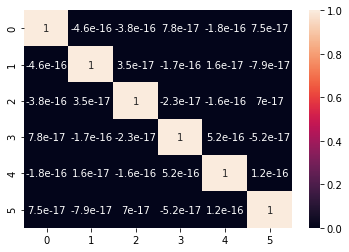

In [106]:
sns.heatmap(pd.DataFrame(X_train_pca).corr(),annot=True)

In [109]:
## Before transforming using PCA

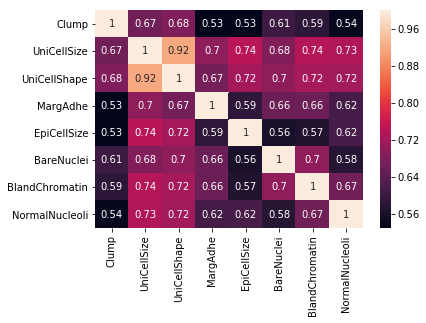

In [107]:
sns.heatmap(X_train.corr(),annot=True)

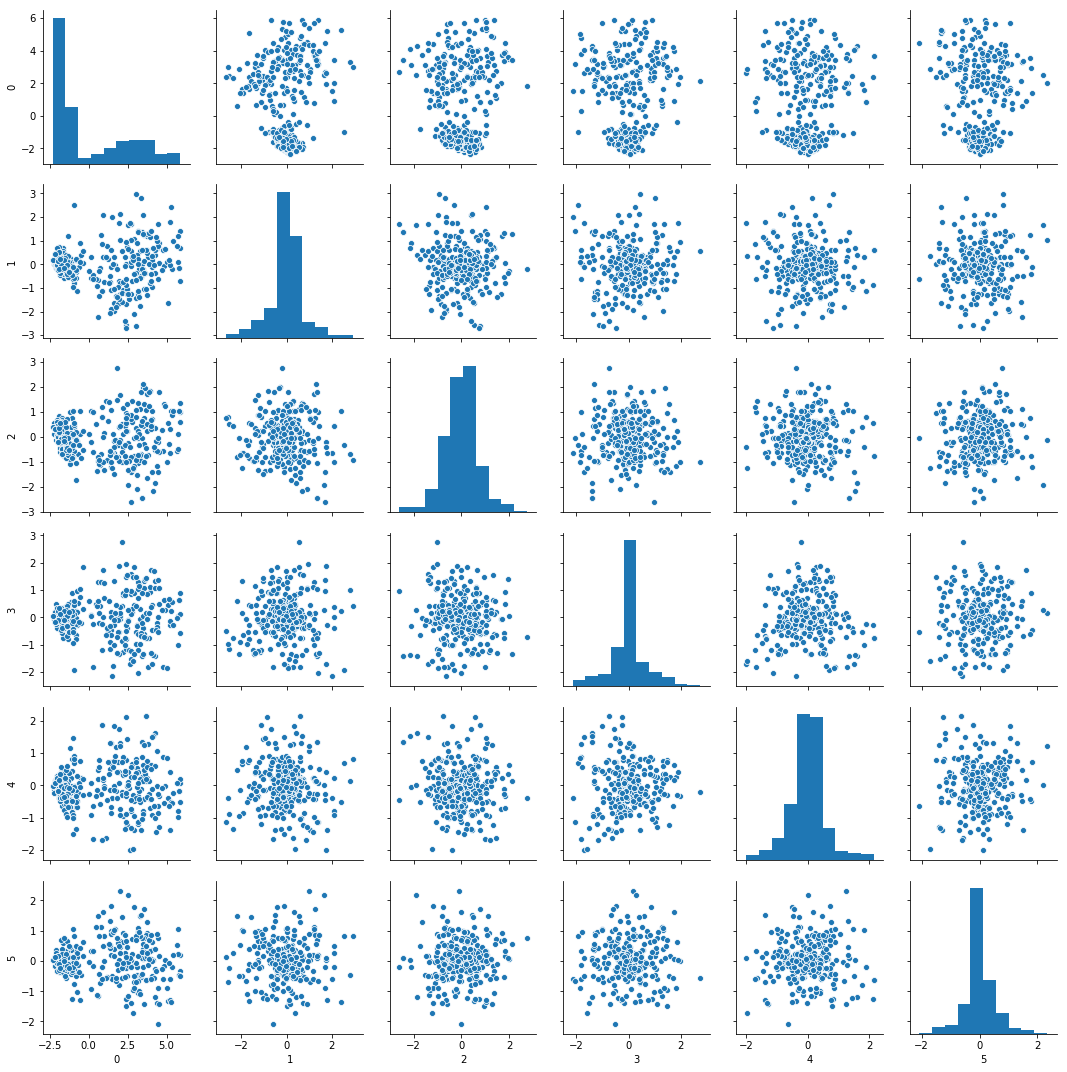

In [127]:
sns.pairplot(pd.DataFrame(X_train_pca))

In [110]:
X_test_pca = pca.fit_transform(X_test)

In [113]:
logr.fit(X_train_pca,Y_train)
print(logr.score(X_test_pca,Y_test))
print(classification_report(Y_test,logr.predict(X_test_pca)))
print(confusion_matrix(Y_test,logr.predict(X_test_pca)))

0.9428571428571428
             precision    recall  f1-score   support

          2       0.95      0.96      0.96       137
          4       0.93      0.90      0.92        73

avg / total       0.94      0.94      0.94       210

[[132   5]
 [  7  66]]


In [114]:
bnb.fit(X_train_pca,Y_train)
print(bnb.score(X_test_pca,Y_test))
print(classification_report(Y_test,bnb.predict(X_test_pca)))
print(confusion_matrix(Y_test,bnb.predict(X_test_pca)))

0.6476190476190476
             precision    recall  f1-score   support

          2       1.00      0.46      0.63       137
          4       0.50      1.00      0.66        73

avg / total       0.83      0.65      0.64       210

[[63 74]
 [ 0 73]]


In [115]:
dtc.fit(X_train_pca,Y_train)
print(dtc.score(X_test_pca,Y_test))
print(classification_report(Y_test,dtc.predict(X_test_pca)))
print(confusion_matrix(Y_test,dtc.predict(X_test_pca)))

0.9571428571428572
             precision    recall  f1-score   support

          2       0.97      0.96      0.97       137
          4       0.93      0.95      0.94        73

avg / total       0.96      0.96      0.96       210

[[132   5]
 [  4  69]]


In [116]:
bgc.fit(X_train_pca,Y_train)
print(bgc.score(X_test_pca,Y_test))
print(classification_report(Y_test,bgc.predict(X_test_pca)))
print(confusion_matrix(Y_test,bgc.predict(X_test_pca)))

0.9476190476190476
             precision    recall  f1-score   support

          2       0.95      0.97      0.96       137
          4       0.94      0.90      0.92        73

avg / total       0.95      0.95      0.95       210

[[133   4]
 [  7  66]]


In [117]:
gbc.fit(X_train_pca,Y_train)
print(gbc.score(X_test_pca,Y_test))
print(classification_report(Y_test,gbc.predict(X_test_pca)))
print(confusion_matrix(Y_test,gbc.predict(X_test_pca)))

0.9571428571428572
             precision    recall  f1-score   support

          2       0.98      0.96      0.97       137
          4       0.92      0.96      0.94        73

avg / total       0.96      0.96      0.96       210

[[131   6]
 [  3  70]]


In [119]:
rfc.fit(X_train_pca,Y_train)
print(rfc.score(X_test_pca,Y_test))
print(classification_report(Y_test,rfc.predict(X_test_pca)))
print(confusion_matrix(Y_test,rfc.predict(X_test_pca)))

0.9523809523809523
             precision    recall  f1-score   support

          2       0.97      0.96      0.96       137
          4       0.92      0.95      0.93        73

avg / total       0.95      0.95      0.95       210

[[131   6]
 [  4  69]]


In [120]:
xgb.fit(X_train_pca,Y_train)
print(xgb.score(X_test_pca,Y_test))
print(classification_report(Y_test,xgb.predict(X_test_pca)))
print(confusion_matrix(Y_test,xgb.predict(X_test_pca)))

0.9523809523809523
             precision    recall  f1-score   support

          2       0.97      0.96      0.96       137
          4       0.92      0.95      0.93        73

avg / total       0.95      0.95      0.95       210

[[131   6]
 [  4  69]]


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [2]:
movies_df = pd.read_csv('movies_metadata.csv')
movies_df.head(10)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

In [5]:
movies_df['description'] = movies_df['overview']+str(movies_df['tagline'])
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 25 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

# Q13  Lets drop the null values in `description` column

In [17]:
movies_1_df = movies_df[~movies_df['description'].isnull()]
movies_1_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...


# Q14 Keep the first occurance and drop duplicates of each title in column `title`

In [29]:
movies_1_df[~movies_1_df['title'].isnull()]['title'].value_counts()

Cinderella                               11
Hamlet                                    9
Beauty and the Beast                      8
Les Misérables                            8
Alice in Wonderland                       8
A Christmas Carol                         7
Treasure Island                           7
Blackout                                  7
The Stranger                              6
The Promise                               6
Aftermath                                 6
The Three Musketeers                      6
The Hunters                               6
Love                                      6
Wuthering Heights                         6
First Love                                6
Mother                                    6
The Forest                                6
The Circle                                6
Home                                      6
The Journey                               6
Jane Eyre                                 6
Macbeth                         

In [30]:
movies_1_df.drop_duplicates(subset='title',keep='first',inplace=True)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
movies_1_df['title'].value_counts()

The Worthless                                                               1
Rush Hour 2                                                                 1
Oh My God                                                                   1
Aap Mujhe Achche Lagne Lage                                                 1
Susannah of the Mounties                                                    1
Do You Take This Man                                                        1
You Don't Know Bo                                                           1
The Scouting Book for Boys                                                  1
Cat's Play                                                                  1
The Disappeared                                                             1
Short Eyes                                                                  1
Justin Bieber: Never Say Never                                              1
House of Usher                                                  

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

In [36]:
movies_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41372 entries, 0 to 45465
Data columns (total 25 columns):
adult                    41372 non-null object
belongs_to_collection    4301 non-null object
budget                   41372 non-null object
genres                   41372 non-null object
homepage                 7225 non-null object
id                       41372 non-null object
imdb_id                  41358 non-null object
original_language        41362 non-null object
original_title           41372 non-null object
overview                 41372 non-null object
popularity               41371 non-null object
poster_path              41040 non-null object
production_companies     41371 non-null object
production_countries     41371 non-null object
release_date             41303 non-null object
revenue                  41371 non-null float64
runtime                  41371 non-null float64
spoken_languages         41371 non-null object
status                   41309 non-null objec

In [105]:
movies_2_df = movies_1_df.reset_index()

In [106]:
movies_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41372 entries, 0 to 41371
Data columns (total 26 columns):
index                    41372 non-null int64
adult                    41372 non-null object
belongs_to_collection    4301 non-null object
budget                   41372 non-null object
genres                   41372 non-null object
homepage                 7225 non-null object
id                       41372 non-null object
imdb_id                  41358 non-null object
original_language        41362 non-null object
original_title           41372 non-null object
overview                 41372 non-null object
popularity               41371 non-null object
poster_path              41040 non-null object
production_companies     41371 non-null object
production_countries     41371 non-null object
release_date             41303 non-null object
revenue                  41371 non-null float64
runtime                  41371 non-null float64
spoken_languages         41371 non-null object

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [107]:
from sklearn.metrics.pairwise import linear_kernel

In [108]:
movies_2_df[0:20000]

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
3,3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...
5,5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
6,6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,An ugly duckling having undergone a remarkable...
7,7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"A mischievous young boy, Tom Sawyer, witnesses..."
8,8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,International action superstar Jean Claude Van...
9,9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,James Bond must unmask the mysterious head of ...


In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df=0, stop_words='english')
tf_idf_matrix = tf.fit_transform(movies_2_df['description'])


In [143]:
tf_idf_matrix.shape

(41372, 2166784)

# Q17  Create cosine similarity matrix

In [144]:
movies_2_df[np.logical_or(movies_2_df['title']=='The Godfather', movies_2_df['title']=='The Dark Knight Rises')]

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
823,834,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,...,2.450664e+08,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0,"Spanning the years 1945 to 1955, a chronicle o..."
17362,18252,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,tt1345836,en,The Dark Knight Rises,...,1.084939e+09,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,False,7.6,9263.0,Following the death of District Attorney Harve...


In [146]:
cosine_similarities_823 = linear_kernel(tf_idf_matrix[823],tf_idf_matrix)
cosine_similarities_823.shape

(1, 41372)

In [147]:
cosine_similarities_17362 = linear_kernel(tf_idf_matrix[17362],tf_idf_matrix)
cosine_similarities_17362.shape

(1, 41372)

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

In [160]:
cos823_df = pd.DataFrame(data={'id':movies_2_df['id'],'title':movies_2_df['title'],'cos':cosine_similarities_823[0]})
cos823_df
cos823_df.sort_values(by='cos',ascending=False)[1:10]

,id,title,cos
4471,49788,Slaves of New York,0.338666
12847,101838,Game Over,0.338666
4182,47596,Snow days,0.338666
26443,47110,Afstiros katallilo,0.338666
32160,43524,Iceland,0.338666
17287,46770,Sur,0.338666
40138,364150,The Godfather Trilogy: 1972-1990,0.331934
12642,10565,Kanak Attack,0.319376
32141,32926,Recep İvedik 3,0.319376


In [161]:
cos17362_df = pd.DataFrame(data={'id':movies_2_df['id'],'title':movies_2_df['title'],'cos':cosine_similarities_17362[0]})
cos17362_df
cos17362_df.sort_values(by='cos',ascending=False)[1:10]

,id,title,cos
17287,46770,Sur,0.284681
32160,43524,Iceland,0.284681
4182,47596,Snow days,0.284681
26443,47110,Afstiros katallilo,0.284681
4471,49788,Slaves of New York,0.284681
12847,101838,Game Over,0.284681
12566,34100,Zen Noir,0.268466
32141,32926,Recep İvedik 3,0.268466
12642,10565,Kanak Attack,0.268466


In [157]:
def recommend(title):
    movieIndex = movies_2_df[movies_2_df['title']==title].index[0]
    cosine_similarities = linear_kernel(tf_idf_matrix[movieIndex],tf_idf_matrix)
    cos_df = pd.DataFrame(data={'id':movies_2_df['id'],'title':movies_2_df['title'],'cos':cosine_similarities[0]})
    return cos_df.sort_values(by='cos',ascending=False)[1:10]

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

In [158]:
recommend('The Godfather')

,id,title,cos
4471,49788,Slaves of New York,0.338666
12847,101838,Game Over,0.338666
4182,47596,Snow days,0.338666
26443,47110,Afstiros katallilo,0.338666
32160,43524,Iceland,0.338666
17287,46770,Sur,0.338666
40138,364150,The Godfather Trilogy: 1972-1990,0.331934
12642,10565,Kanak Attack,0.319376
32141,32926,Recep İvedik 3,0.319376


In [159]:
recommend('The Dark Knight Rises')

,id,title,cos
17287,46770,Sur,0.284681
32160,43524,Iceland,0.284681
4182,47596,Snow days,0.284681
26443,47110,Afstiros katallilo,0.284681
4471,49788,Slaves of New York,0.284681
12847,101838,Game Over,0.284681
12566,34100,Zen Noir,0.268466
32141,32926,Recep İvedik 3,0.268466
12642,10565,Kanak Attack,0.268466


In [210]:
recommend('Pride and Prejudice')

,id,title,cos
4471,49788,Slaves of New York,0.312012
26443,47110,Afstiros katallilo,0.312012
4182,47596,Snow days,0.312012
32160,43524,Iceland,0.312012
12847,101838,Game Over,0.312012
17287,46770,Sur,0.312012
24266,20414,"Grande, grosso e Verdone",0.294240
9606,2029,Tanguy,0.294240
17731,15086,La Patinoire,0.294240


In [212]:
recommend('Titanic')

,id,title,cos
26443,47110,Afstiros katallilo,0.217304
32160,43524,Iceland,0.217304
12847,101838,Game Over,0.217304
4471,49788,Slaves of New York,0.217304
17287,46770,Sur,0.217304
4182,47596,Snow days,0.217304
33986,6417,Dallas Pashamende,0.204927
35627,4290,Supergator,0.204927
27722,1481,Metal Skin,0.204927


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [164]:
jokes_df = pd.read_csv('jokes.csv')
jokes_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [166]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [177]:
ratings = jokes_df[0:200]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 157.9 KB


In [178]:
ratings.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q22 Change the column indices from 0 to 99

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [180]:
ratings.replace(99.0,0.0,inplace=True)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [181]:
ratings

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [185]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ratings_diff_array = ss.fit_transform(ratings)
ratings_diff = pd.DataFrame(ratings_diff_array)
ratings_diff

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.178514,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,1.371667,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.968748,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-1.014639,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,0.958652,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,1.371667,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-1.060529,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.371667,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,1.371667,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.086733,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [200]:
ratings_diff.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,...,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,3.365364e-17,-1.110223e-17,-9.658940e-17,-4.107825e-17,3.719247e-17,-8.881784e-18,-2.636780e-18,-1.665335e-18,2.331468e-17,-4.329870e-17,...,-4.385381e-17,-3.497203e-17,8.770762e-17,-7.244205e-17,1.054712e-16,2.858824e-17,-2.137179e-17,1.198694e-16,1.840889e-16,7.549517e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,...,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.565325e+00,-2.277344e+00,-2.150499e+00,-2.230392e+00,-2.350430e+00,-1.802882e+00,-2.548886e+00,-1.803067e+00,-2.013555e+00,-2.449717e+00,...,-3.315734e+00,-3.091947e+00,-3.404882e+00,-2.942232e+00,-3.127874e+00,-3.338140e+00,-3.055176e+00,-2.795808e+00,-3.037688e+00,-3.095201e+00
25%,-8.769674e-01,-3.074734e-01,-6.503974e-01,-2.163991e-01,-2.553067e-01,-7.715675e-01,-3.012213e-01,-8.286289e-01,-8.629168e-01,-1.164936e-01,...,-1.924594e-01,-5.532901e-02,-3.621928e-01,-1.840428e-01,-1.759224e-01,-1.404012e-01,-2.333493e-01,-2.685824e-02,-4.144395e-02,-1.609539e-01
50%,4.084254e-02,-1.178809e-01,-1.211299e-01,-5.328420e-02,1.818801e-01,6.971984e-02,-3.012213e-01,1.208696e-01,1.578107e-01,-4.146297e-03,...,-1.924594e-01,-5.532901e-02,-3.621928e-01,-1.840428e-01,-1.759224e-01,-1.404012e-01,-2.333493e-01,-2.685824e-02,-4.144395e-02,-1.609539e-01
75%,1.371667e+00,6.410449e-01,8.038136e-01,4.691319e-01,1.818801e-01,7.878582e-01,8.254634e-01,8.040453e-01,7.238505e-01,3.273092e-01,...,-1.924594e-01,-5.532901e-02,1.430941e-01,-1.292252e-01,-1.759224e-01,-1.404012e-01,-1.993514e-01,-2.685824e-02,-4.144395e-02,-1.609539e-01
max,1.371667e+00,1.943728e+00,1.769548e+00,2.025169e+00,2.472895e+00,1.708016e+00,1.814094e+00,1.620828e+00,1.929134e+00,2.237834e+00,...,2.913710e+00,2.813817e+00,2.511284e+00,2.435660e+00,2.585483e+00,2.959825e+00,2.600840e+00,2.615970e+00,2.715346e+00,2.595274e+00


In [199]:
popular_jokes_df = pd.DataFrame(data={'Joke':ratings.columns,'MeanRatings':ratings_diff.mean()})
popular_jokes_df.sort_values(by='MeanRatings',ascending=False)[0:10]

,Joke,MeanRatings
99,Joke99,1.840889e-16
82,Joke82,1.243450e-16
98,Joke98,1.198694e-16
21,Joke21,1.065814e-16
95,Joke95,1.054712e-16
93,Joke93,8.770762e-17
48,Joke48,7.771561e-17
74,Joke74,7.743806e-17
100,Joke100,7.549517e-17
50,Joke50,7.494005e-17
